# Data visualization on Palmer Archipelago Penguins

## Goal

In this project, we aim to visualize penguin data on Palmer Archipelago, which is a group of islands off the northwestern coast of the Antarctic Peninsula. Through the data visualization, we want to explore and analyze the relationship between factors such as species, sex, and island location, and the penguin's physical attributes, including body weight, culmen (the upper ridge of a penguin's beak) length and depth, and flipper length.

## Introduction

Raw dataset `Penguins.csv` consists of 334 penguin samples collected from three islands in the Palmer Archipelago, including penguin-related attributes such as species name, island location, culmen length and depth, flipper length, weight, and sex.

For each column of `Penguins.csv`:
- species: species name
- island: island name where the penguin is located
- culmen_length_mm: length of culmen (in millimeters)
- culmen_depth_mm: depth of culmen (in millimeters)
- flipper_length_mm: length of flipper (in millimeters)
- body_mass_g: penguin body weight (in grams)
- sex: penguin sex

## Data Parsing

Use Pandas to read the csv file and convert it to DataFrame, named as `original_data`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Data Assessment and Cleansing

Here, we will evaluate and clean the data in `original_data`. This will be performed in terms of structure and content, i.e. neatness and cleanliness.

For data structure, we check if the data meet the three criteria of "one column for each variable", "one row for each observation", and "one table for each type of observation".

For data content, we check the existence of missing data, duplicated data and invalid data.

We make a copy of the table and assign it `cleaned_data` for better readability.

In [4]:
cleaned_data = original_data.copy()

### Evaluate the data structure

In [5]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


From the first 10 rows of the table, we don't see any structural problems. Thus, we can move forward to check the content.

### Evaluate the data content

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the output, there are 344 entries in the data. There are missing values in `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex`. We will perform assessment on them further.

Notice that `species`, `sex`, and `island` are categorical data, so we can convert their data type to `Category`.

In [7]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

Let's review the data again.

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### Handling missing data

In the previous section, we know that there are missing values in `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex`. 

Let's review some rows to further understand the data.

In [10]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Notice that the two entries at index 3 and 339 have missing values except the species and the island location. They won't help us analyze the penguins, so we are safe to delete them.

In [14]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

Let's check the null values in `sex`.

In [15]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


Although sex is missing in these entries, the entries still provide value to the analysis of other attributes such as culmen and flipper.
Notice that Seaborn and Matplotlib can automatically ignore null values, so we may keep these entries.

#### Handling duplicated data

Based on the data content and meaning, we allow duplication on them.

#### Handling inconsistent data

In [16]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [17]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [18]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In `sex` column, we see an entry with value `.`. That doesn't refer to any sex type. Hence, we should replace the value to `NaN`.

In [ ]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

In [20]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

The invalid value is removed.

We may also check if there are other invalid values such as negative numbers on body mass. Here, we can use `describe()` to quickly check that.

In [21]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Everything looks good. Now we are ready to explore and visualize the data.

## Data Visualization

In this section, we will explore and analyze the penguin data through visualization. Let's review what data we have right now.

In [22]:
# Set the palette to pastel in seaborn.
sns.set_palette("pastel")

In [23]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Analyze penguin species

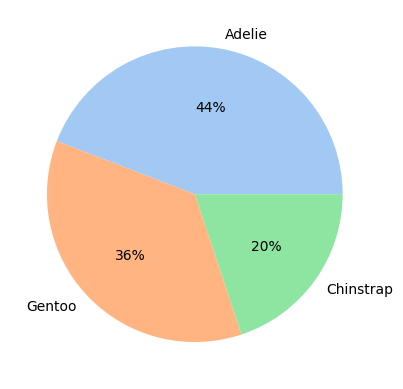

In [24]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

From the sample we know that `Adelie` has the largest percentage of the penguins, whereas `Chinstrap` takes the smallest.

### Analyze the islands that penguins are located

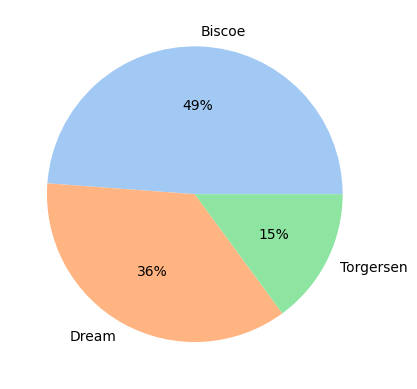

In [25]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

About half the penguins in the sample are from `Biscoe` island.

### Analyze the penguin sex

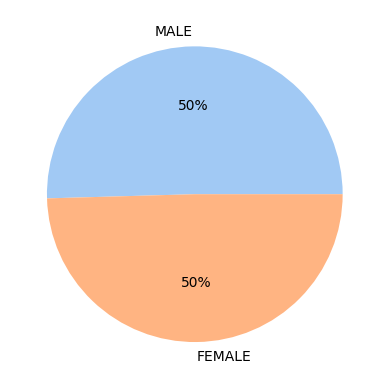

In [26]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

The male penguin shares the same percentage with the female one. Even distribution.

### Analyze penguin species in different islands

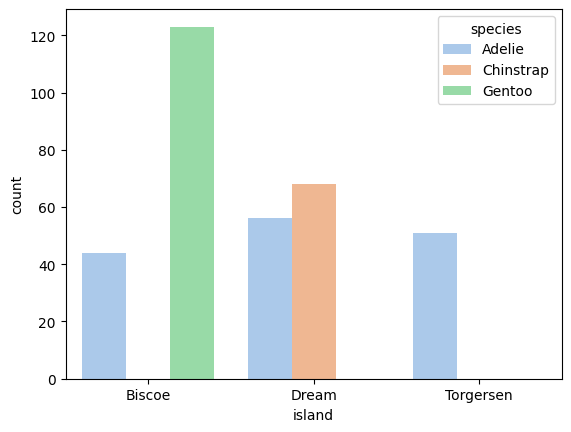

In [27]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

Through observation, `Adelie` penguins exist in `Biscoe`, `Dream`, and `Torgersen`. However, `Chinstrap` only exist in `dream` island, and `Gentoo` only exist in Biscoe.

### Analyze penguin sex in different islands

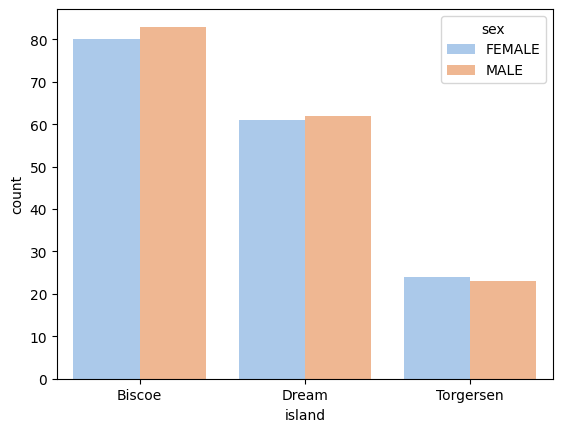

In [28]:
sns.countplot(cleaned_data, x='island', hue='sex')
plt.show()

Pretty even sex distribution in all islands.

### Check correlation between each pair of variables

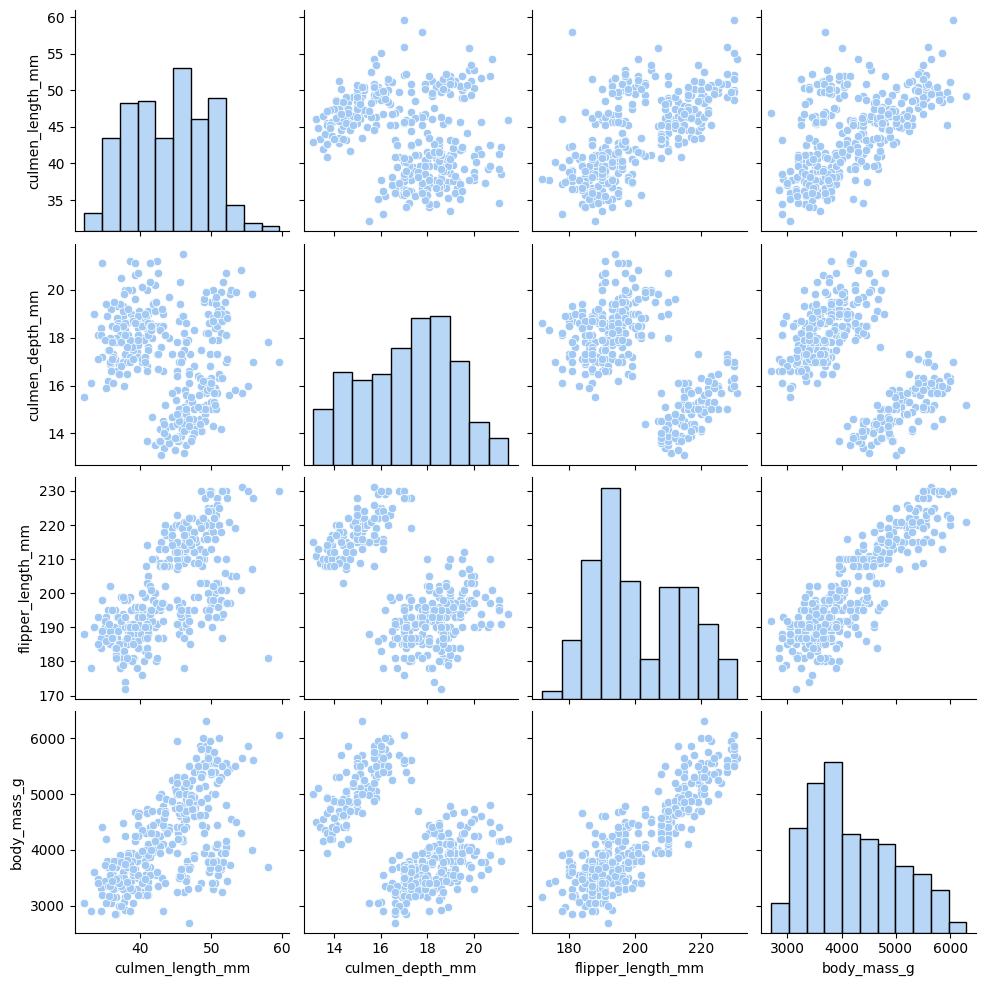

In [29]:
sns.pairplot(cleaned_data)
plt.show()

The histograms show that the distributions of culmen length, culmen depth, flipper length, and body weight are not normally distributed. This suggests that it may contain multiple independent sets of sample data.

We can also observe different clusters in scatter plots. In the next steps we should revisit the data by categorizing penguin species and sex.

### Check correlation between each pair of variables based on species

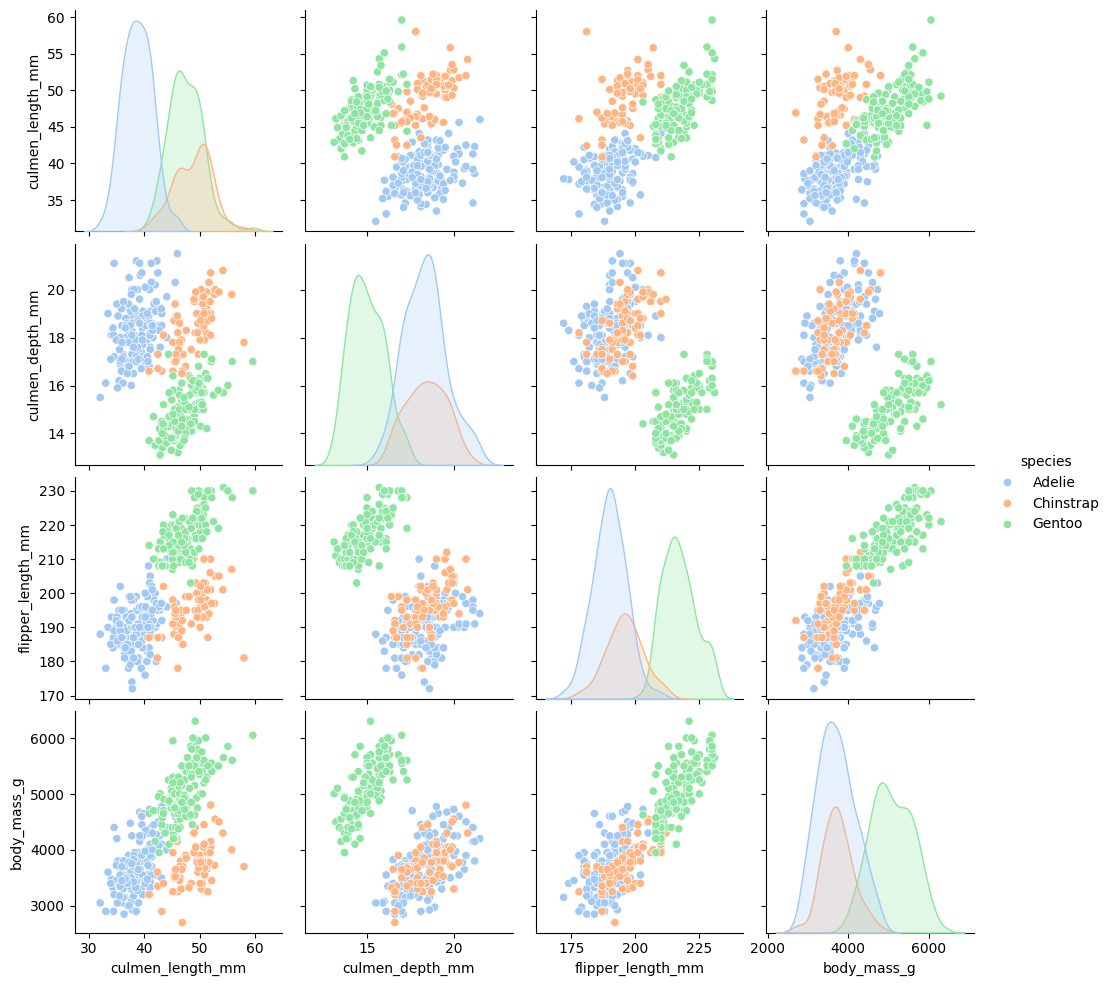

In [30]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

The data of penguin samples of the same species are clustered together on the scatter plots. That indicates similarities in the relationships between various physical attributes. These findings help us predict penguin species based on body weight, culmen, and flipper.

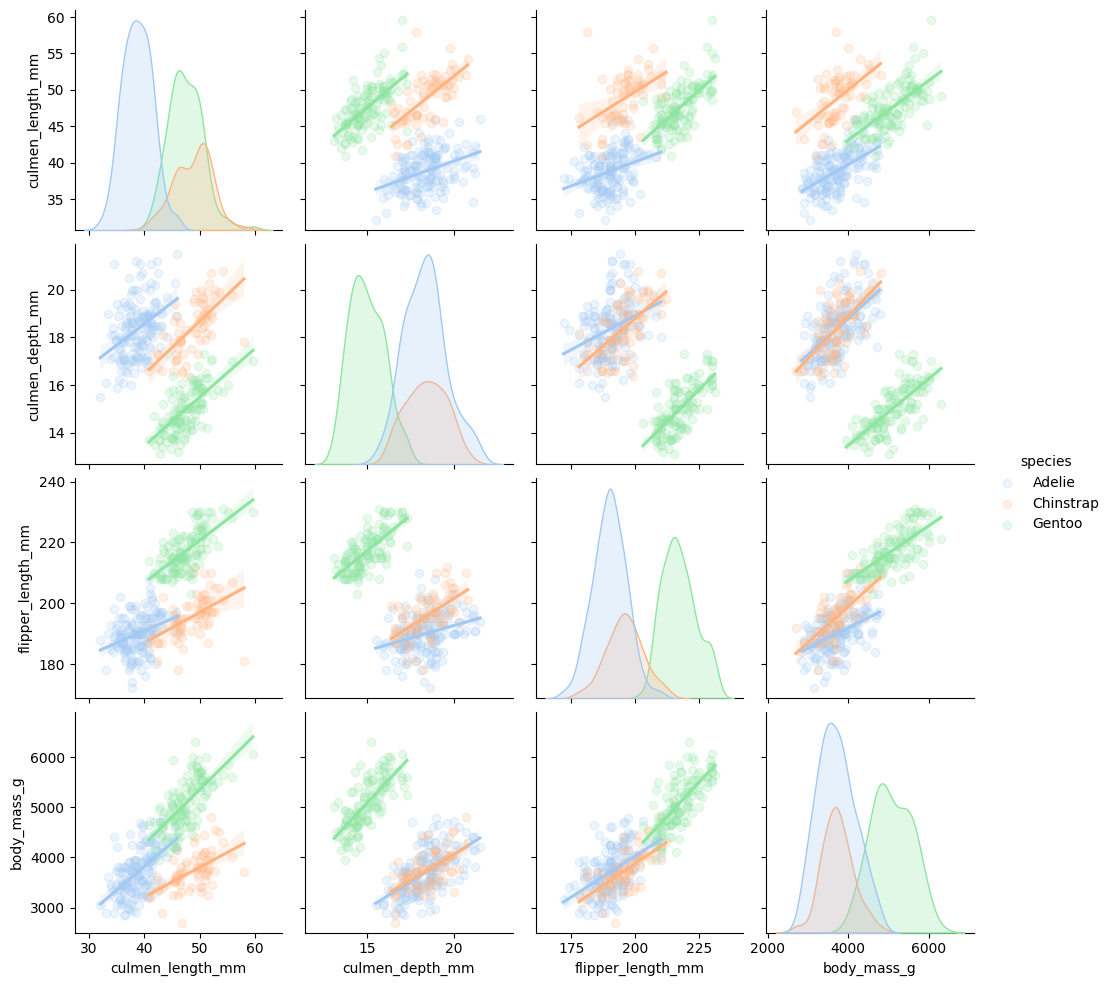

In [32]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.2}})
plt.show()

By applying linear regression, we can see linear association between various attributes:
1. Longer culmen associates deeper culmen.
2. Longer culmen associates longer flipper.
3. Longer culmen associates larger weight.
4. Deeper culmen associates longer flipper.
5. Deeper culmen associates larger weight.
6. Longer flipper associates larger weight.

### Check correlation between each pair of variables based on sex

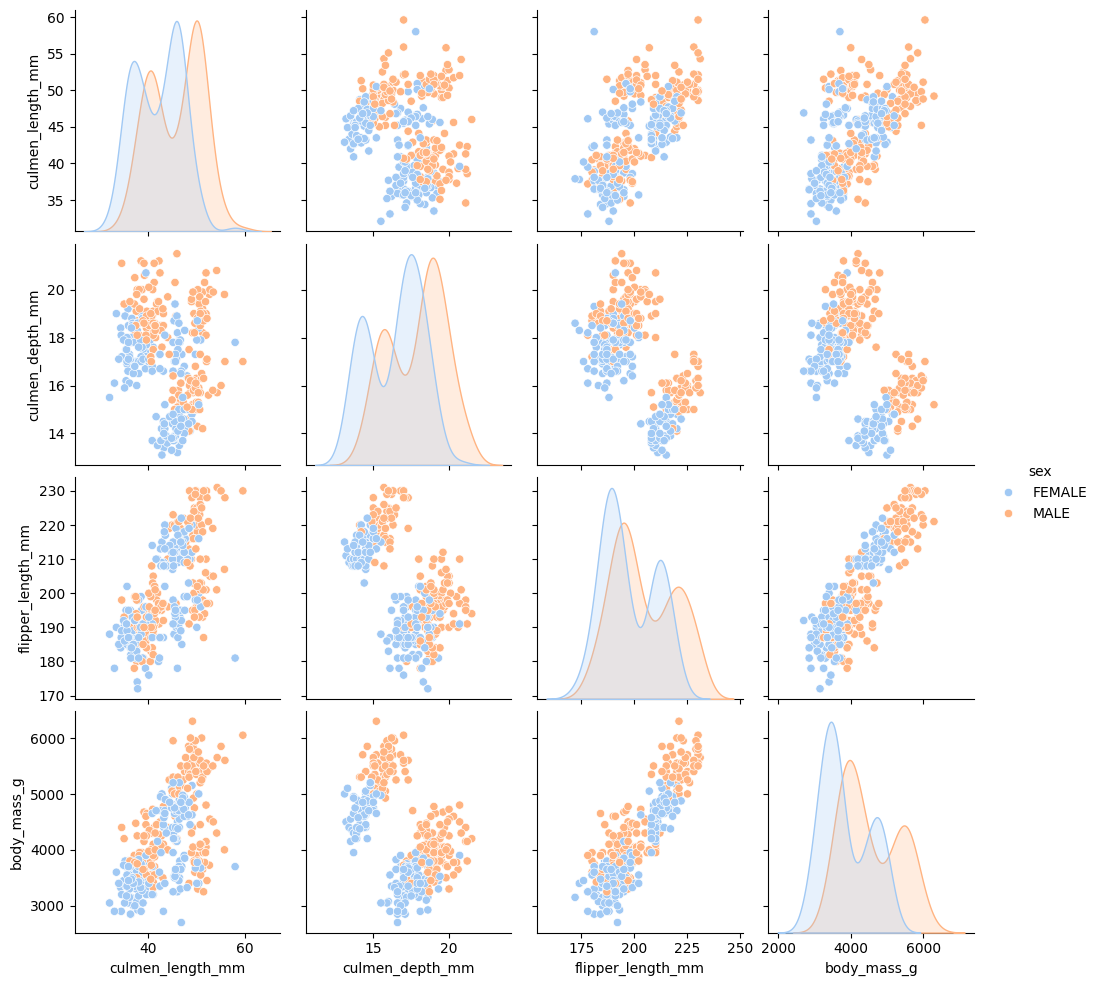

In [33]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

From the sample data, we can observe that male penguins tend to have longer and deeper culmen, longer flipper, and larger weight comparing to female penguins.